<h1 style="text-align: center;">Thermochemical measurement</h1>

## Theory


### Thermochemical Measurement Formula  
The thermal effect during a thermochemical measurement can be expressed as:  
$$ Q = \left( \sum (m_i c_i) \Delta t' \right) + q $$  
where:  
- \( q \): Heat transfer between the calorimeter and the environment.  
- \( \Delta t' \): Temperature difference *without* heat loss to the environment.  
- \( m_i \): Mass of the calorimeter components (stirrer, beaker, thermometer, test substance).  
- \( c_i \): Heat capacity of each component.  

---

### Temperature-Time Curve (ABCD)  
The curve ABCD represents the temperature change over time. A key issue with this graph is that it **does not solely reflect the heat absorbed by the analyzed substance** but **also includes heat lost to the environment** (heat loss). Here:  
- **\( T_{\text{рав}} \)**: Equilibrium temperature of the calorimeter.  

#### Key Terms:  
- **\( \Delta T_{\text{nm}} \)**: Temperature difference *including* heat transfer effects.  
- **\( \Delta T'_{\text{EF}} \)**: Hypothetical temperature difference if the reaction occurred instantaneously *with no heat loss*.  

---

### Estimating Heat Loss Compensation  
- **Lines BF and EC** approximate the reaction’s temperature *assuming no environmental heat loss*.  
- This assumes all heat is released instantaneously, as represented by the vertical line **EF**.  

---




## Graphic

<img src="example.jpg" width="400" height="400"/>

## Code

Import the necessary libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

Create arrays with the experimental data. Here def_lis() is just a function to check the copied/imported values

In [2]:
n_measure = np.arange(1, 31)
time = np.array([i for i in range(0,900,30)])
temp = np.array([24.73, 24.74, 24.74, 24.74, 24.76, 24.77, 24.77, 24.77, 24.77, 24.78, 25.04, 25.29, 25.54, 25.79, 26.26, 26.49, 26.72, 26.94,
                27.16, 27.12, 27.16, 27.12, 27.07, 27.03, 26.95, 26.91, 26.87, 26.84, 26.80, 26.76])

def lis(lista):
    print(lista)
    print(len(lista))

lis(n_measure)
lis(time)
lis(temp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
30
[  0  30  60  90 120 150 180 210 240 270 300 330 360 390 420 450 480 510
 540 570 600 630 660 690 720 750 780 810 840 870]
30
[24.73 24.74 24.74 24.74 24.76 24.77 24.77 24.77 24.77 24.78 25.04 25.29
 25.54 25.79 26.26 26.49 26.72 26.94 27.16 27.12 27.16 27.12 27.07 27.03
 26.95 26.91 26.87 26.84 26.8  26.76]
30


Start and end are the positions in the array of the start of the temperature jump and the end of it. **Note that end is position of the element of in the array from right to left** 
<br>The main purpose of this code is to compute the temperature difference without heat loss to the environment (Δt'). For that we will make 3 interpolations:
- initial_fit: AB
- final_fit:CD
- jump_fit: BC

<br> Then we will calculate the intersection between **KP** and **BC** expressed by the point **l**, and calculate the temperatures at points **E** and **F** using the initial_fit for F and final_fit for E.
<br> Finally we calculate temperature difference without heat loss to the environment (Δt') as the rest of **E and F**.

Intersection at (x=398.84, y=25.97)
At x = 398.835459, y = 24.8055
At x = 398.835459, y = 27.3848
Temperature difference without heat loss to the environment (Δt') is equal to  2.5793


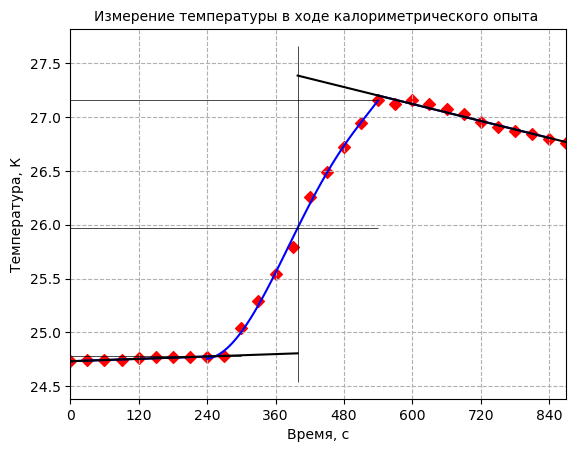

In [6]:
# Configure plot settings
plt.rc({
    'figure.figsize': (8, 6),
    'font.family': 'Times New Roman',
    'font.size': 25
})

start, end = 10, -12

# Optimized interpolation function
def interpol(x,y, degree,lab, mark, color, colorline):
    coeffs = np.polyfit(x, y, degree)
    x_fit = np.linspace(x[0],x[-1],100)  
    y_fit = np.polyval(coeffs, x_fit)
    plt.plot(x_fit, y_fit, c=colorline , linestyle = '-')
    return coeffs

# Perform polynomial fits
initial_fit = interpol(time[:start], temp[:start], 1, 'AF Началал', 's', 'r','b')
final_fit = interpol(time[end:-1], temp[end:-1], 1, 'AF Началал', 's', 'r','b')
jump_fit = interpol(time[int(start-2):int(end+1)], temp[int(start-2):int(end+1)], 5, 'AF Началал', 's', 'r','b')

# Calculate midpoint temperature
middle = temp[start-1] + (temp[end] - temp[start-1])/2

#Check the intersection between KP and BC
adjusted_coeffs = jump_fit.copy()
adjusted_coeffs[-1] -= middle
roots = np.roots(adjusted_coeffs)    # Find roots of P(x) - 26 = 0
real_roots = roots[np.isreal(roots)].real.round(decimals=6)  # Extract real roots and round to handle numerical noise
valid_roots = real_roots[(real_roots >= time[start]) & (real_roots <= time[end])]  # Filter valid roots (e.g., x between 0 and 300)

coordinates = []
for x in valid_roots:
    coordinates.append((x, middle))
    print(f"Intersection at (x={x:.2f}, y={middle:.2f})")
    
#plot the horizontal lines
plt.hlines(y = temp[start-1], xmin = 0, xmax = time[start], colors='k', linestyles='solid', linewidth=0.5)
plt.hlines(y = temp[end], xmin = 0, xmax = time[end], colors='k', linestyles='solid', linewidth=0.5)
plt.hlines(y = middle, xmin = 0, xmax = time[end], colors='k', linestyles='solid', linewidth=0.5)

#plot the vertical lines
h_line = coordinates[0][0]
plt.vlines(x = h_line, ymin = temp[start]-0.5, ymax = temp[end]+0.5, colors='k', linestyles='solid', linewidth=0.5)


#Intersection between FE with AB and ED
y_value_F = np.polyval(initial_fit, h_line)
print(f"At x = {h_line}, y = {y_value_F:.4f}")

y_value_E = np.polyval(final_fit, h_line)
print(f"At x = {h_line}, y = {y_value_E:.4f}")

#getting delta temperature
delta_t = y_value_E - y_value_F
print(f"Temperature difference without heat loss to the environment (Δt') is equal to  {delta_t:.4f}")

def plot_to_EF(function, l_start, l_end):
    x_vals = np.linspace(l_start, l_end, 100) 
    y_vals = np.polyval(function, x_vals)
    plt.plot(x_vals, y_vals, 'k',)
    
plot_to_EF(initial_fit, 0, h_line)
plot_to_EF(final_fit,  h_line, time[-1])

#Plot parameters
plt.title('Измерение температуры в ходе калориметрического опыта ', fontsize=10 )
plt.xlabel('Время, s')
plt.ylabel('Температура, C')
plt.grid(linestyle = '--')
plt.scatter(time, temp, marker = 'D', c='r',  )
plt.xlim(0, time[-1] )
plt.xticks([i for i in range(0,time[-1], 120)])
plt.savefig('Heat capacity.png', dpi=300)
plt.show()

## Pandas
Finally we can convert our data into a panda Dataframe
<br>Время - Time
<br>Температура - Temperature

In [5]:
experiment = {'Время':time,
             "Температура":temp}
df = pd.DataFrame(experiment)
df

,Время,Температура
0,0,24.73
1,30,24.74
2,60,24.74
3,90,24.74
4,120,24.76
5,150,24.77
6,180,24.77
7,210,24.77
8,240,24.77
9,270,24.78


---

### Contact Information  
For inquiries regarding this code or analysis, please contact:  

**Email:** [red.neuronalec@gmail.com](mailto:red.neuronalec@gmail.com)  
**Name:** Minta B.  

---
